In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os,glob,tqdm


In [11]:
df=pd.read_excel("./Data/train_fourth.xlsx")
print(df.shape)
df.head()

(33155, 72)


,timestamp,week,month,day,hour,minute,dayofweek,playtime,ot,start_time,...,Cloud,Relative_humidity,raining,Cloud1,discomfort,weekend_affective,total_price_grade,price_grade1,category_total_price,category_start_time1
0,2019-01-01 06:00:00,1,1,1,6,0,1,20,0,6,...,3.4,49.5,sunny,구름조금,26.63,0,A,A,A,6
1,2019-01-01 06:00:00,1,1,1,6,0,1,20,0,6,...,3.4,49.5,sunny,구름조금,26.63,0,A,A,A,6
2,2019-01-01 06:20:00,1,1,1,6,20,1,20,1,6,...,3.4,49.5,sunny,구름조금,26.63,0,A,A,A,6
3,2019-01-01 06:20:00,1,1,1,6,20,1,20,1,6,...,3.4,49.5,sunny,구름조금,26.63,0,A,A,A,6
4,2019-01-01 06:40:00,1,1,1,6,40,1,20,2,6,...,3.4,49.5,sunny,구름조금,26.63,0,A,A,A,6


In [13]:
df_a=df[['quantity','discomfort']]

In [15]:
df.columns

Index(['timestamp', 'week', 'month', 'day', 'hour', 'minute', 'dayofweek',
       'playtime', 'ot', 'start_time', 'end_time', 'schedule_day',
       'schedule_week', 'uniquecode', 'productcode', 'productname', 'category',
       'small_category', 'price', 'profit', 'quantity', 'price_grade',
       'best_schedule', 'day_count', 'start_time1', 'std_quantity',
       'good_sell_time', 'year', '기온(°C)', '강수량(mm)', '풍속(m/s)', '풍향(16방위)',
       '습도(%)', '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)', '해면기압(hPa)', '일조(hr)',
       '일조 QC플래그', '일사(MJ/m2)', '적설(cm)', '3시간신적설(cm)', '전운량(10분위)',
       '중하층운량(10분위)', '운형(운형약어)', '최저운고(100m )', '시정(10m)', '현상번호(국내식)',
       '지면온도(°C)', '지면온도 QC플래그', '5cm 지중온도(°C)', '10cm 지중온도(°C)',
       '20cm 지중온도(°C)', '30cm 지중온도(°C)', 'twc', 'net_temp', 'status',
       'windchill', 'Precipitation', 'Average_temperature',
       'Minimum_temperature', 'Maximum_temperature', 'Cloud',
       'Relative_humidity', 'raining', 'Cloud1', 'discomfort',
       'weekend_affect

In [16]:
df_b=df[['windchill', 'Precipitation', 'Average_temperature',
       'Minimum_temperature', 'Maximum_temperature', 'Cloud',
       'Relative_humidity', 'raining', 'Cloud1', 'discomfort',
       'weekend_affective', 'total_price_grade', 'price_grade1',
       'category_total_price', 'category_start_time1','quantity']]
df_b.corr()

,windchill,Precipitation,Average_temperature,Minimum_temperature,Maximum_temperature,Cloud,Relative_humidity,discomfort,weekend_affective,category_start_time1,quantity
windchill,1.000000,0.173718,0.964219,0.949911,0.956556,0.281448,0.379626,0.986396,0.038395,-0.046472,0.045398
Precipitation,0.173718,1.000000,0.190443,0.240446,0.132603,0.374050,0.498737,0.206726,-0.022533,-0.012225,0.015553
Average_temperature,0.964219,0.190443,1.000000,0.988698,0.988434,0.303594,0.405214,0.959125,0.014923,0.013682,-0.006098
Minimum_temperature,0.949911,0.240446,0.988698,1.000000,0.959286,0.375090,0.481889,0.951345,0.020512,0.008259,-0.002228
Maximum_temperature,0.956556,0.132603,0.988434,0.959286,1.000000,0.210310,0.317756,0.946000,0.010095,0.020005,-0.010695
Cloud,0.281448,0.374050,0.303594,0.375090,0.210310,1.000000,0.602494,0.289021,0.031603,-0.004203,0.009271
Relative_humidity,0.379626,0.498737,0.405214,0.481889,0.317756,0.602494,1.000000,0.379222,0.024093,-0.033317,0.033066
discomfort,0.986396,0.206726,0.959125,0.951345,0.946000,0.289021,0.379222,1.000000,0.038000,-0.050752,0.048204
weekend_affective,0.038395,-0.022533,0.014923,0.020512,0.010095,0.031603,0.024093,0.038000,1.000000,-0.381514,0.386301
category_start_time1,-0.046472,-0.012225,0.013682,0.008259,0.020005,-0.004203,-0.033317,-0.050752,-0.381514,1.000000,-0.782765


In [14]:
df_a.corr()

,quantity,discomfort
quantity,1.000000,0.048204
discomfort,0.048204,1.000000


In [53]:
df_summer=df[(df['month']<=4)&(df['month']>=1)|(df['month']>=8)&(df['month']<=12)]

In [54]:
df_summer=df_summer[['discomfort','quantity']]

In [55]:
df_summer.corr()

,discomfort,quantity
discomfort,1.000000,0.058758
quantity,0.058758,1.000000


In [86]:
df['windchill']

0       -6.91
1       -6.91
2       -6.91
3       -6.91
4       -6.91
         ... 
33150    8.52
33151    8.52
33152    9.08
33153    9.08
33154    9.08
Name: windchill, Length: 33155, dtype: float64

In [87]:
df_winter=df[(df['month']==1)]

In [84]:
df_winter=df_winter[['windchill','quantity']]

In [85]:
df_winter.corr()

,windchill,quantity
windchill,1.000000,0.207623
quantity,0.207623,1.000000


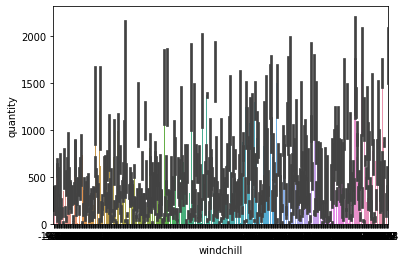

In [89]:
sns.barplot(x="windchill", y="quantity", data=df_winter)